<a href="https://colab.research.google.com/github/gyeongdong13/Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(ANN)_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keras 패키지를 활용한 인공신경망 구현 실습

In [ ]:
import tensorflow as tf          #딥러닝 패키지
import numpy as np               #배열계산 패키지
import matplotlib.pyplot as plt  #시각화 패키지

1. MNIST Data 불러오기

In [ ]:
# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
# image size는 28x28의 grayscale 2차원 데이터

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images.shape, train_labels.shape

# numpy 배열, 3차원, 이미지개수 : 60,000장, 가로 28, 세로 28

((60000, 28, 28), (60000,))

In [ ]:
train_images[0].shape # 첫번째 이미지에 대한 정보

(28, 28)

2. MNIST Data 시각화

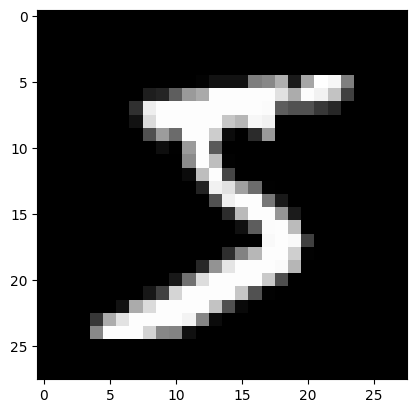

In [ ]:
# 2차원 배열을 흰색과 검은색으로 표현하여 시각화할 수 있음

plt.imshow(train_images[0], cmap='gray')
# plt.title(train_labels[0], size=20)

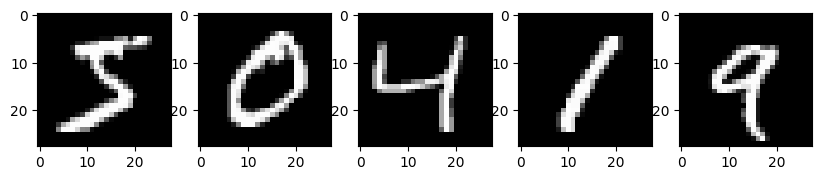

In [ ]:
# 여러개의 그림을 한번에 표현하기

ncols = 5

figure, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(train_images[:5][i], cmap='gray')

인공신경망을 사용하여 자동으로 이미지 분류

3. MNIST 데이터 전처리 수행

In [ ]:
# MNIST 데이터의 0~255 픽셀 값을 0에서 1 사이값으로 scale하고, 데이터 타입을 float32로 변경해준다.

# Keras 패키지에서는 입력데이터가 float 이어야 하기 때문.
# 또한, 일반적으로 딥러닝은 input 값에 대하여 스케일링 해주어야 한다.

# 이미지 값 변환
train_images_2 = np.array(train_images/255.0, dtype=np.float32) # 0에서 1사이의 값으로 변환(최댓값이 255이므로)
test_images_2 = np.array(test_images/255.0, dtype=np.float32)
# 딥러닝은 워낙 깊이 계산하기 때문에 보통 0~1사이로 변환해서 컴퓨터 계산속도 올려줌

# 라벨 값 변환
train_labels_2 = np.array(train_labels, dtype=np.float32)
test_labels_2 = np.array(test_labels, dtype=np.float32)

print(train_images_2.shape, train_labels_2.shape)
print(test_images_2.shape, test_labels_2.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
train_labels_2[0] # 첫번째 사진의 라벨이 5
# 이진 분류가 아닌 0~9까지 다중분류를 해야함

5.0

In [ ]:
# 라벨값을 원핫인코딩(One-Hot-Encoding) 해주어야 함
# 0~9까지 정수값이 들어가 있으면 원핫인코딩

from tensorflow.keras.utils import to_categorical

train_labels_2 = to_categorical(train_labels_2)
test_labels_2 = to_categorical(test_labels_2)

In [ ]:
train_labels_2[0] # 위에서는 5라는 숫자가 나왔지만 원핫인코딩 결과 바뀐 것으로 나옴

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 학습데이터를 학습데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_images_2, train_labels_2, test_size=0.3, random_state=1)

train_x.shape, val_x.shape, train_y.shape, val_y.shape

((42000, 28, 28), (18000, 28, 28), (42000, 10), (18000, 10))

4. 인공신경망 모델의 구조 설계

In [ ]:
from tensorflow.keras.layers import Dense      # 완전연결층 => 가장 기본적인 딥러닝 층
from tensorflow.keras.layers import Flatten    # 평탄화층   => ANN 구조에 맞게 변환하기 위한 층(2차원데이터를 1차원데이터로 평탄화)
from tensorflow.keras.models import Sequential # Keras 패키지의 Model 생성 함수

In [ ]:
ANN_model = Sequential() # 인공신경망 모델 선언
ANN_model.add(Flatten(input_shape = ([28, 28]))) #MNIST 이미지 구조를 평탄화 : (28 * 28) -> (784), 이차원 데이터를 일차원 데이터로 변환
ANN_model.add(Dense(20, activation = 'relu'))    #첫번째 은닉층 노드의 수를 20개로 설정, 활성화함수는 relu 사용
ANN_model.add(Dense(20, activation = 'relu'))    #두번째 은닉층 노드의 수를 20개로 설정, 활성화함수는 relu 사용
ANN_model.add(Dense(10, activation = 'softmax')) #출력층 노드의 수는 Y의 카테고리 수와 맞추어준다 !
# 다중분류이므로 무조건 activation은 softmax로 사용

5. 인공신경망 모델의 손실함수(Loss)와 최적화함수(Optimizer) 설정

In [ ]:
# 최적화함수는 Adam(오차를 최소화하는 함수)
# 손실함수는 CategoricalCrossentropy #이진분류인 경우에는 BinaryCrossentropy를 사용하여야 함
# 정확도 계산 방식은 Accuracy를 사용 # Accuracy외에도 precision, F1_score 등 설정 가능

from tensorflow.keras.optimizers import Adam # 그레디언트 부스팅을 좀 더 고도화
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
# ANN 모델에 손실함수와 최적화함수를 설정하는 방법은 comile 함수를 이용하면 된다.

ANN_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 다중분류 오차 계산 함수는 categorical_crossentropy

In [ ]:
ANN_model.summary()

# 독립변수가 16330개라는 의미 => 계산이 굉장히 오래걸림

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


6. 인공신경망 모델 학습 수행

In [ ]:
epochs = 5
batch_size = 32 #주로 2의 배수로 선정함 -> 속도 향상

history = ANN_model.fit(x=train_x, y=train_y, batch_size=batch_size, validation_data=(val_x, val_y),
                    epochs=epochs, verbose=1)

Epoch 1/5
1313/1313 [==============================] - 7s 4ms/step - loss: 0.4543 - accuracy: 0.8682 - val_loss: 0.2711 - val_accuracy: 0.9236
Epoch 2/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2351 - accuracy: 0.9314 - val_loss: 0.2360 - val_accuracy: 0.9335
Epoch 3/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1978 - accuracy: 0.9420 - val_loss: 0.2174 - val_accuracy: 0.9396
Epoch 4/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1741 - accuracy: 0.9493 - val_loss: 0.1972 - val_accuracy: 0.9445
Epoch 5/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1578 - accuracy: 0.9536 - val_loss: 0.1926 - val_accuracy: 0.9464


7. 평가 데이터를 통한 예측 및 결과확인

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
# 딥러닝에서는 accuracy를 계산하는데 model.evaluate를 model.score 대신 사용함
# 첫번째 결과값은 loss, 두번째 결과값은 accuracy를 의미함

ANN_model.evaluate(test_images_2, test_labels_2, verbose=0)

[0.17100386321544647, 0.9516000151634216]

In [ ]:
#예측한 값과 실제값 눈으로 비교

pred_y=ANN_model.predict(test_images_2) #.argmax(axis=1)
print(pred_y[:10])
print(test_labels[:10])

313/313 [==============================] - 1s 2ms/step
[[2.66951190e-08 4.48693314e-08 9.48243323e-05 2.95548793e-03
  8.17437840e-10 6.03908393e-06 1.91139769e-12 9.96936202e-01
  7.46387627e-08 7.25676227e-06]
 [7.01133613e-05 2.96824310e-05 9.96745706e-01 2.89911078e-03
  1.06968989e-09 7.73445299e-06 2.06238212e-04 7.89938226e-10
  4.13246526e-05 5.78819526e-09]
 [4.31273074e-05 9.85563815e-01 4.26910538e-03 1.64539856e-03
  3.21949017e-04 1.11897127e-04 7.06985709e-04 5.92198083e-03
  1.35216874e-03 6.35846081e-05]
 [9.99849558e-01 4.41088138e-10 2.46723175e-05 9.08041557e-07
  5.27117072e-06 4.71390958e-05 1.27044850e-05 4.55581403e-06
  1.59553019e-06 5.36724947e-05]
 [3.82450889e-05 3.44664706e-08 5.43474627e-04 1.93816777e-06
  9.96194541e-01 4.98154950e-05 8.73072640e-05 2.17969980e-04
  9.49410241e-05 2.77158851e-03]
 [7.21557035e-06 9.91584480e-01 2.63925176e-04 2.15681808e-04
  4.36916489e-05 1.00592854e-06 1.59958836e-05 7.52846245e-03
  3.32686177e-04 6.64548224e-06]
 [3

In [ ]:
#예측한 값과 실제값 눈으로 비교

pred_y=ANN_model.predict(test_images_2).argmax(axis=1) # Dense가 10개이므로 10개의 결과가 나오므로 그 10개의 예측값 중 가장 확률이 큰 값으로 예측하겠다는 의미
print(pred_y[:10])
print(test_labels[:10])

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


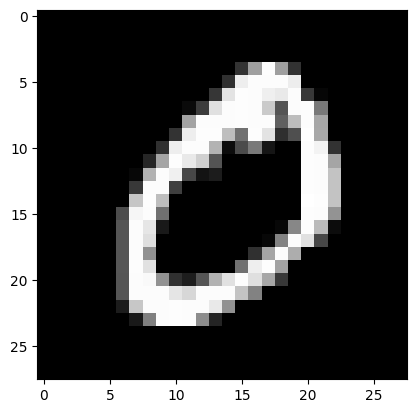

In [ ]:
plt.imshow(train_images[1], cmap='gray')